In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.express as px
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from math import sqrt
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.multioutput import RegressorChain
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

filepath = 'D:/sima khanmohammadi/sima.xlsx'
df = pd.read_excel(filepath)
df

,Gender,Parameter,Number,Response,Mean,SD
0,male,median,111,NCV,60.2,5.3
1,male,median,111,DL,3.5,0.4
2,male,median,111,AMP,8.3,2.5
3,male,median,111,PL,3.2,0.3
4,male,median,111,AMP2,65.0,22.9
5,male,ulnar,104,NCV,59.4,6.0
6,male,ulnar,104,DL,3.3,0.4
7,male,ulnar,104,AMP,7.2,2.1
8,male,ulnar,104,PL,3.1,0.4
9,male,ulnar,104,AMP2,58.0,18.9


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gender     60 non-null     object 
 1   Parameter  60 non-null     object 
 2   Number     60 non-null     int64  
 3   Response   60 non-null     object 
 4   Mean       60 non-null     float64
 5   SD         60 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.9+ KB


In [3]:
df.describe()

,Number,Mean,SD
count,60.000000,60.000000,60.000000
mean,65.166667,21.316667,4.401667
std,39.590774,23.650643,6.091380
min,26.000000,2.100000,0.200000
25%,26.000000,3.200000,0.400000
50%,62.000000,5.550000,1.200000
75%,104.250000,50.100000,6.050000
max,111.000000,65.000000,23.500000


In [4]:
df['Parameter'].unique()

array(['median', 'ulnar', 'radial'], dtype=object)

In [5]:
df['Response'].unique()

array(['NCV', 'DL', 'AMP', 'PL', 'AMP2'], dtype=object)

In [6]:
one_hot=pd.get_dummies(df['Response'])
df=df.drop('Response',axis=1)
df=df.join(one_hot)

In [7]:
one_hot=pd.get_dummies(df['Gender'])
df=df.drop('Gender',axis=1)
df=df.join(one_hot)

In [8]:
one_hot=pd.get_dummies(df['Parameter'])
df=df.drop('Parameter',axis=1)
df=df.join(one_hot)

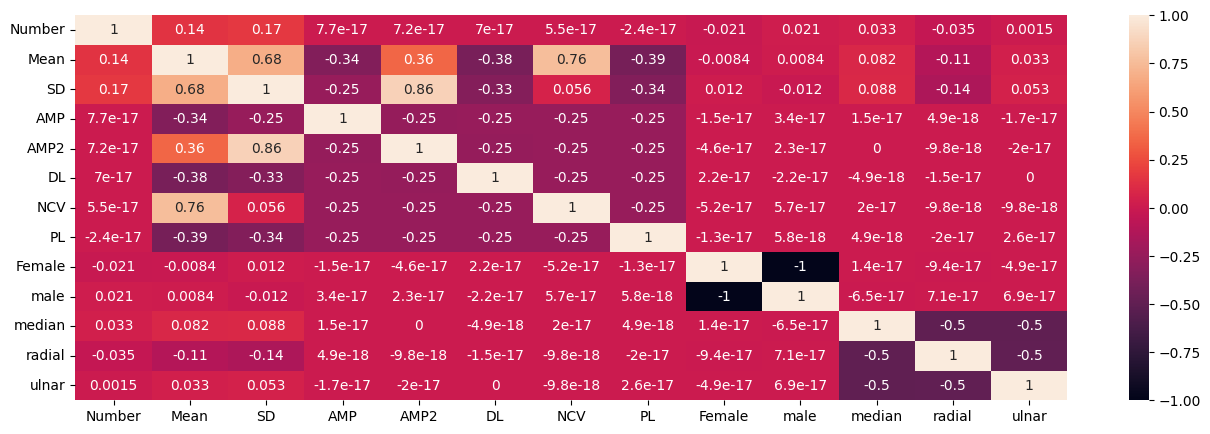

In [9]:
corr=df.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr,annot=True)
plt.savefig('heatmap.png',  bbox_inches='tight') 

In [10]:
df.isnull().sum()

Number    0
Mean      0
SD        0
AMP       0
AMP2      0
DL        0
NCV       0
PL        0
Female    0
male      0
median    0
radial    0
ulnar     0
dtype: int64

In [11]:
df

,Number,Mean,SD,AMP,AMP2,DL,NCV,PL,Female,male,median,radial,ulnar
0,111,60.2,5.3,0,0,0,1,0,0,1,1,0,0
1,111,3.5,0.4,0,0,1,0,0,0,1,1,0,0
2,111,8.3,2.5,1,0,0,0,0,0,1,1,0,0
3,111,3.2,0.3,0,0,0,0,1,0,1,1,0,0
4,111,65.0,22.9,0,1,0,0,0,0,1,1,0,0
5,104,59.4,6.0,0,0,0,1,0,0,1,0,0,1
6,104,3.3,0.4,0,0,1,0,0,0,1,0,0,1
7,104,7.2,2.1,1,0,0,0,0,0,1,0,0,1
8,104,3.1,0.4,0,0,0,0,1,0,1,0,0,1
9,104,58.0,18.9,0,1,0,0,0,0,1,0,0,1


In [12]:
df['Mean']=df.pop('Mean')
df['SD']=df.pop('SD')
df

,Number,AMP,AMP2,DL,NCV,PL,Female,male,median,radial,ulnar,Mean,SD
0,111,0,0,0,1,0,0,1,1,0,0,60.2,5.3
1,111,0,0,1,0,0,0,1,1,0,0,3.5,0.4
2,111,1,0,0,0,0,0,1,1,0,0,8.3,2.5
3,111,0,0,0,0,1,0,1,1,0,0,3.2,0.3
4,111,0,1,0,0,0,0,1,1,0,0,65.0,22.9
5,104,0,0,0,1,0,0,1,0,0,1,59.4,6.0
6,104,0,0,1,0,0,0,1,0,0,1,3.3,0.4
7,104,1,0,0,0,0,0,1,0,0,1,7.2,2.1
8,104,0,0,0,0,1,0,1,0,0,1,3.1,0.4
9,104,0,1,0,0,0,0,1,0,0,1,58.0,18.9


In [14]:
import numpy as np

# داده‌ها
data = df['Mean']

# محاسبه چارک‌ها
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

# محاسبه IQR
IQR = Q3 - Q1

# حد پایین و بالا برای شناسایی مقادیر پرت
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# پیدا کردن outlier ها
outliers = [x for x in data if x < lower_bound or x > upper_bound]

# چاپ نتایج
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
print("Outliers:", outliers)

Q1: 3.2
Q3: 50.1
IQR: 46.9
Lower bound: -67.14999999999999
Upper bound: 120.44999999999999
Outliers: []


In [13]:
df.iloc[:,-2:]

,Mean,SD
0,60.2,5.3
1,3.5,0.4
2,8.3,2.5
3,3.2,0.3
4,65.0,22.9
5,59.4,6.0
6,3.3,0.4
7,7.2,2.1
8,3.1,0.4
9,58.0,18.9


In [14]:
def printPredictions(y_true,y_pred, count):
  print(f"Predictions: ")
  print(y_true.assign(
      Mean_pred = y_pred[:,0],
      SD_pred = y_pred[:,1]   
  ).head(count).to_markdown(index = False))
 
def showResults(y_true, y_pred, count = 18):
  print("R2 score: ",r2_score(y_true,y_pred))
  print("Mean squared error: ",mean_squared_error(y_true,y_pred))
  print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_true,y_pred)))
  print("Mean absolute error: ",mean_absolute_error(y_true,y_pred))
  printPredictions(y_true,y_pred, count)

In [15]:
X=df.iloc[:,:-2]
y=df.iloc[:,-2:]

In [16]:
scaler=preprocessing.MinMaxScaler()
X=scaler.fit_transform(X)
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42,shuffle='True')
print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)

(42, 11) (18, 11)
(42, 2) (18, 2)


In [17]:
linear = LinearRegression()
linear.fit(X_train,y_train)
showResults(y_test,linear.predict(X_test))

R2 score:  0.8873187386926147
Mean squared error:  12.393988496518212
Root Mean Squared Error:  3.520509692717549
Mean absolute error:  2.5574139591484806
Predictions: 
|   Mean |   SD |   Mean_pred |    SD_pred |
|-------:|-----:|------------:|-----------:|
|   60.2 |  5.3 |   65.991    |  7.98129   |
|   59.4 |  6   |   64.3363   |  7.40782   |
|    3.5 |  0.4 |    1.69857  | -0.257081  |
|   59.9 |  3.7 |   54.9433   |  5.16024   |
|    2.4 |  0.3 |    5.5044   |  0.62433   |
|   30.2 | 13.5 |   34.8382   | 14.113     |
|    3.2 |  0.4 |    3.80757  |  0.465691  |
|    3.2 |  0.4 |    1.93967  |  0.335973  |
|    3.8 |  1   |    5.76264  |  1.15381   |
|    2.1 |  0.5 |   -4.42107  | -1.41395   |
|    3.7 |  0.5 |    0.729312 | -0.0349645 |
|   53   |  4.3 |   54.0446   |  4.8084    |
|    3.7 |  0.5 |    2.59722  |  0.0947535 |
|    3.2 |  0.3 |   12.9873   |  3.15703   |
|    5.4 |  1.2 |    1.29924  |  0.513614  |
|    7.9 |  2.1 |   10.7297   |  3.36681   |
|    3.1 |  0.4 |   1

In [18]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40],
    
    
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'bootstrap': True, 'max_depth': 40, 'n_estimators': 1000}

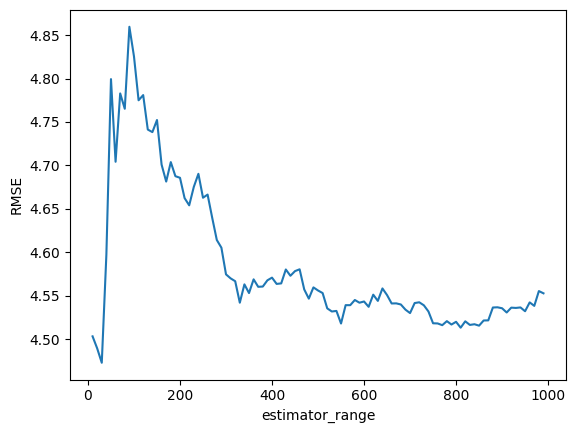

In [19]:


# lista de valores de n_estimators
estimator_range = range(10, 1000, 10)

RMSE_scores = []

# 5-fold cross-validation con cada valor de n_estimators
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=123)
    MSE_scores = cross_val_score(rfreg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
plt.plot(estimator_range,RMSE_scores)
plt.xlabel('estimator_range')
plt.ylabel('RMSE')    
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')    

In [22]:


# Create the parameter grid based on the results of random search 
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}
# Create a based model
rfreg = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfreg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [21]:
rfreg = RandomForestRegressor(n_estimators=30)
rfreg.fit(X_train,y_train)
showResults(y_test,rfreg.predict(X_test))

R2 score:  0.9943628884891333
Mean squared error:  0.4492595679012334
Root Mean Squared Error:  0.6702682805423761
Mean absolute error:  0.4060185185185172
Predictions: 
|   Mean |   SD |   Mean_pred |   SD_pred |
|-------:|-----:|------------:|----------:|
|   60.2 |  5.3 |    59.7733  |  5.53333  |
|   59.4 |  6   |    58.97    |  5.71333  |
|    3.5 |  0.4 |     3.41    |  0.38     |
|   59.9 |  3.7 |    57.91    |  4.18333  |
|    2.4 |  0.3 |     2.42    |  0.266667 |
|   30.2 | 13.5 |    28.4633  | 12.4767   |
|    3.2 |  0.4 |     3.36667 |  0.36     |
|    3.2 |  0.4 |     3.39333 |  0.363333 |
|    3.8 |  1   |     4.54    |  1.26     |
|    2.1 |  0.5 |     3.94333 |  0.966667 |
|    3.7 |  0.5 |     3.57667 |  0.41     |
|   53   |  4.3 |    53.9067  |  4.48333  |
|    3.7 |  0.5 |     3.54333 |  0.406667 |
|    3.2 |  0.3 |     3.62    |  0.47     |
|    5.4 |  1.2 |     5.49    |  1.34     |
|    7.9 |  2.1 |     6.52667 |  1.83667  |
|    3.1 |  0.4 |     3.10667 |  0.363

Text(0, 0.5, 'RMSE')

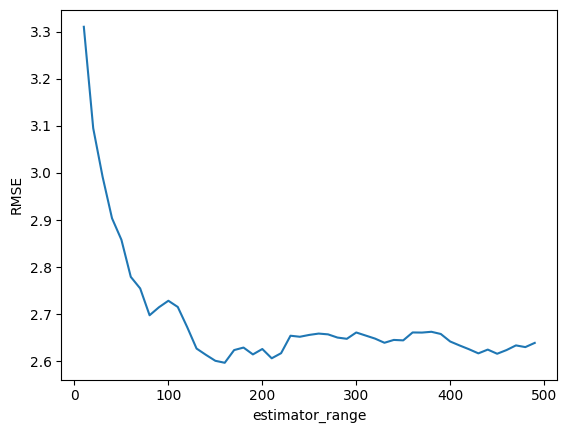

In [100]:
estimator_range = range(10, 500, 10)

RMSE_scores = []

# 5-fold cross-validation con cada valor de n_estimators
for estimator in estimator_range:
    extra_reg= ExtraTreesRegressor(n_estimators=estimator, random_state=123)
    MSE_scores = cross_val_score(extra_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
plt.plot(estimator_range,RMSE_scores)
plt.xlabel('estimator_range')
plt.ylabel('RMSE')    

In [22]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators' : [100, 500, 600, 800, 1000],
'max_depth' :[5, 10, 15, 20, 30],

    'criterion':['squared_error', 'absolute_error'],

}
# Create a based model
extra_reg = ExtraTreesRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = extra_reg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


{'criterion': 'absolute_error', 'max_depth': 15, 'n_estimators': 100}

In [23]:
extra_reg = ExtraTreesRegressor(n_estimators=100 , max_depth=15 , criterion='absolute_error')
extra_reg.fit(X_train,y_train)
showResults(y_test,extra_reg.predict(X_test))

R2 score:  0.996980568261017
Mean squared error:  0.08911247222222163
Root Mean Squared Error:  0.2985171221592182
Mean absolute error:  0.14769444444444915
Predictions: 
|   Mean |   SD |   Mean_pred |   SD_pred |
|-------:|-----:|------------:|----------:|
|   60.2 |  5.3 |      60.12  |     6.2   |
|   59.4 |  6   |      59.645 |     6.053 |
|    3.5 |  0.4 |       3.5   |     0.4   |
|   59.9 |  3.7 |      59.9   |     3.7   |
|    2.4 |  0.3 |       2.4   |     0.3   |
|   30.2 | 13.5 |      30.2   |    13.5   |
|    3.2 |  0.4 |       3.3   |     0.3   |
|    3.2 |  0.4 |       3.3   |     0.3   |
|    3.8 |  1   |       2.905 |     0.786 |
|    2.1 |  0.5 |       3.156 |     0.896 |
|    3.7 |  0.5 |       3.581 |     0.4   |
|   53   |  4.3 |      53     |     4.3   |
|    3.7 |  0.5 |       3.513 |     0.4   |
|    3.2 |  0.3 |       3.3   |     0.3   |
|    5.4 |  1.2 |       5.4   |     1.2   |
|    7.9 |  2.1 |       7.76  |     2.356 |
|    3.1 |  0.4 |       3.1   |     0

In [25]:


# setup the pipeline
pipeline = Pipeline(steps = [('scale', StandardScaler(with_mean=True, with_std=True)),
                             ('estimator', RegressorChain(SVR()))])
# setup the parameter grid

param_grid = {'estimator__base_estimator__C': [0.1, 1, 10, 100]}   

# setup the grid search
grid_search = GridSearchCV(pipeline, param_grid = param_grid, 
                          cv = 3, verbose = 2,n_jobs = -1,scoring='neg_mean_squared_error')
# fit model   
grid_search.fit(X_train, y_train)

# Instantiate the grid search model


grid_search.best_params_                             

Fitting 3 folds for each of 4 candidates, totalling 12 fits


{'estimator__base_estimator__C': 100}

In [26]:
# Defining the chained multioutput model
svm_chain = RegressorChain(SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1))
svm_chain.fit(X_train,y_train)
showResults(y_test,svm_chain.predict(X_test))

R2 score:  0.6043513088451327
Mean squared error:  6.47042674213749
Root Mean Squared Error:  2.5437033518351724
Mean absolute error:  1.5783660708577085
Predictions: 
|   Mean |   SD |   Mean_pred |   SD_pred |
|-------:|-----:|------------:|----------:|
|   60.2 |  5.3 |    63.0345  | 11.898    |
|   59.4 |  6   |    60.4745  |  4.66403  |
|    3.5 |  0.4 |     2.90783 |  0.482995 |
|   59.9 |  3.7 |    53.7696  | 11.2778   |
|    2.4 |  0.3 |     5.082   |  1.91589  |
|   30.2 | 13.5 |    31.942   | 12.829    |
|    3.2 |  0.4 |     4.62575 |  0.977936 |
|    3.2 |  0.4 |     2.821   |  0.361538 |
|    3.8 |  1   |     5.07054 |  1.63802  |
|    2.1 |  0.5 |     1.98462 |  1.05793  |
|    3.7 |  0.5 |     3.4186  |  0.380719 |
|   53   |  4.3 |    53.0936  | 10.3161   |
|    3.7 |  0.5 |     3.09039 |  0.368388 |
|    3.2 |  0.3 |     7.03294 |  2.63209  |
|    5.4 |  1.2 |     5.77245 |  1.65008  |
|    7.9 |  2.1 |     7.42045 |  2.18839  |
|    3.1 |  0.4 |     5.4182  |  1.85009

In [27]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators' : [100, 300, 500, 800, 1000],
'max_depth' :[3, 5, 8, 10, 15],
'booster':['gbtree','gblinear'],
'learning_rate':[0.05,0.1,0.15,0.20]
}
# Create a based model
xgbRegressor = XGBRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgbRegressor, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'booster': 'gbtree',
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 500}

Text(0, 0.5, 'RMSE')

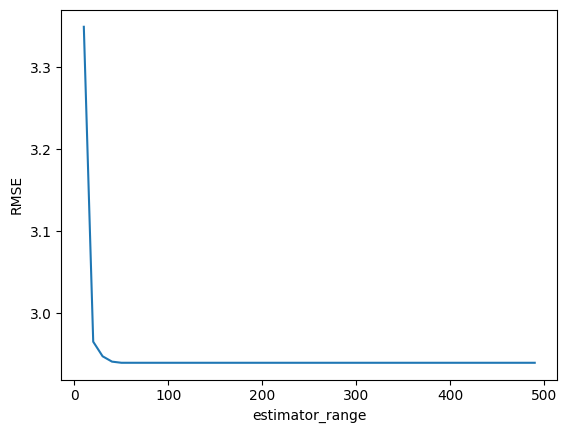

In [104]:
estimator_range = range(10, 1000, 10)

RMSE_scores = []

# 5-fold cross-validation con cada valor de n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    xgbRegressor=  XGBRegressor(n_estimators=estimator, random_state=123)
    MSE_scores = cross_val_score(xgbRegressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
plt.plot(estimator_range,RMSE_scores)
plt.xlabel('estimator_range')
plt.ylabel('RMSE')    

In [28]:
xgbRegressor = XGBRegressor(n_estimators=500 , max_depth=3 , booster='gbtree',learning_rate=0.05)
xgbRegressor.fit(X_train,y_train) 
showResults(y_test,xgbRegressor.predict(X_test))

R2 score:  0.9950243830049603
Mean squared error:  0.8764223839642872
Root Mean Squared Error:  0.9361743341730145
Mean absolute error:  0.5353134509589936
Predictions: 
|   Mean |   SD |   Mean_pred |   SD_pred |
|-------:|-----:|------------:|----------:|
|   60.2 |  5.3 |    62.3358  |  6.1418   |
|   59.4 |  6   |    60.2381  |  6.11937  |
|    3.5 |  0.4 |     4.1153  |  0.458922 |
|   59.9 |  3.7 |    59.4894  |  3.8204   |
|    2.4 |  0.3 |     2.53877 |  0.253501 |
|   30.2 | 13.5 |    28.1789  | 13.3699   |
|    3.2 |  0.4 |     3.74553 |  0.300296 |
|    3.2 |  0.4 |     3.80064 |  0.332007 |
|    3.8 |  1   |     3.63754 |  1.61842  |
|    2.1 |  0.5 |     2.47932 |  0.525643 |
|    3.7 |  0.5 |     4.03728 |  0.419499 |
|   53   |  4.3 |    53.1422  |  4.29297  |
|    3.7 |  0.5 |     4.2065  |  0.366962 |
|    3.2 |  0.3 |     7.04593 |  0.335426 |
|    5.4 |  1.2 |     5.29131 |  1.04413  |
|    7.9 |  2.1 |     6.5044  |  2.37874  |
|    3.1 |  0.4 |     4.22464 |  0.418

In [29]:
scores1 = ['LinearRegression',r2_score(y_test,linear.predict(X_test)),
mean_squared_error(y_test,linear.predict(X_test)),  
mean_absolute_error (y_test,linear.predict(X_test)),
          np.sqrt(mean_squared_error(y_test,linear.predict(X_test)))]
   

In [30]:
scores2 = ['RandomForestRegressor',r2_score(y_test,rfreg.predict(X_test)),
mean_squared_error(y_test,rfreg.predict(X_test)),  
mean_absolute_error (y_test,rfreg.predict(X_test)),np.sqrt(mean_squared_error(y_test,rfreg.predict(X_test)))]
 

In [31]:
scores3 = ['ExtraTreesRegressor',r2_score(y_test,extra_reg.predict(X_test)),
mean_squared_error(y_test,extra_reg.predict(X_test)),  
mean_absolute_error (y_test,extra_reg.predict(X_test)),np.sqrt(mean_squared_error(y_test,extra_reg.predict(X_test)))]

In [32]:
scores4 = ['RegressorChain',r2_score(y_test,svm_chain.predict(X_test)),
mean_squared_error(y_test,svm_chain.predict(X_test)),  
mean_absolute_error (y_test,svm_chain.predict(X_test)),np.sqrt(mean_squared_error(y_test,svm_chain.predict(X_test)))]


In [33]:
scores5 = ['XGBRegressor',r2_score(y_test,xgbRegressor.predict(X_test)),
mean_squared_error(y_test,xgbRegressor.predict(X_test)),  
mean_absolute_error (y_test,xgbRegressor.predict(X_test)),np.sqrt(mean_squared_error(y_test,xgbRegressor.predict(X_test)))]


In [34]:
scores=[scores1]+[scores2]+[scores3]+[scores4]+[scores5]
scores

[['LinearRegression',
  0.8873187386926147,
  12.393988496518212,
  2.5574139591484806,
  3.520509692717549],
 ['RandomForestRegressor',
  0.9943628884891333,
  0.4492595679012334,
  0.4060185185185172,
  0.6702682805423761],
 ['ExtraTreesRegressor',
  0.996980568261017,
  0.08911247222222163,
  0.14769444444444915,
  0.2985171221592182],
 ['RegressorChain',
  0.6043513088451327,
  6.47042674213749,
  1.5783660708577085,
  2.5437033518351724],
 ['XGBRegressor',
  0.9950243830049603,
  0.8764223839642872,
  0.5353134509589936,
  0.9361743341730145]]

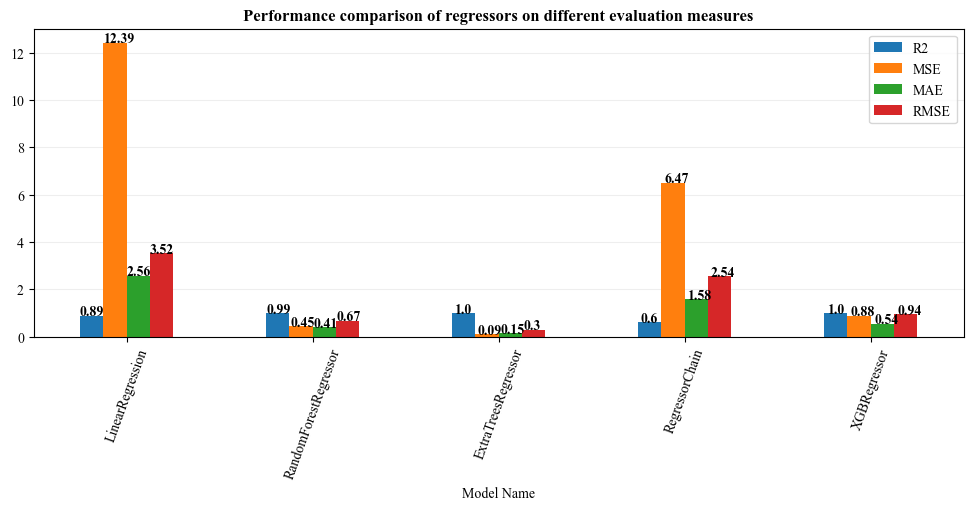

In [35]:
# Plot multiple columns bar chart
plt.rcParams["font.family"] = "Times New Roman"
df = pd.DataFrame(scores, columns=["Model Name","R2", "MSE", "MAE","RMSE"])
df=df.round(2)
ax=df.plot(x="Model Name", y=["R2", "MSE", "MAE","RMSE"], kind="bar",figsize=(12,4),rot=70)
# Display the plot

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), weight='bold')
ax.set_title('Performance comparison of regressors on different evaluation measures', fontweight ="bold") 
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
plt.rcParams["font.family"] = "Times New Roman"
plt.savefig('plot2.png', bbox_inches='tight')